# Point Set Triangulation

In [ ]:
!cd ../ && mvn clean install

### Import required modules

In [2]:
from random import random,randint
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import time

### Integrate Java

In [3]:
fname="points.txt"
filename="../python/"+fname
outputfile="../python/triangulation.txt"

def runTriangulationAlgorithm():
    global filename,outputfile;
    global points,points_count,width,height,fname;
    cmd="cd ../target/ && java -jar triangulation.jar %d %d %s %s"%(width,height,filename,outputfile)
    #print(cmd)
    assert os.system(cmd)==0


### Read inputs

In [4]:
def parseTriangles():
    global triangles;
    triangles = []

    with open(outputfile,"r") as f:
        for line in f.readlines():
            t = list(map(float,line.split()))
            triangle = [
                [t[1],t[0]],
                [t[3],t[2]],
                [t[5],t[4]]
            ]
            triangles.append(triangle)

def drawTriangulation():
    global points,points_count,width,height,fname;
    global triangles;
    triangles = np.array(triangles,dtype=float);
    fig, ax = plt.subplots(1,1,figsize=(40,25));
    num=1
    for t in triangles:
        polygon = Polygon(t,edgecolor="red",facecolor="none")
        ax.add_patch(polygon)
        ax.annotate(str(num),((t[0][0]+t[1][0]+t[2][0])/3, (t[0][1]+t[1][1]+t[2][1])/3), color='black', weight='bold', 
                fontsize=24, ha='center', va='center')
        num+=1
        plt.scatter(t[:,0],t[:,1],s=20,color="blue")
    plt.ylim(0,height)
    plt.xlim(0,width)
    plt.show()


### Generate input data

In [5]:
#rectangle width
width = 3000000
#rectangle height
height = 4000000
points_count=10
points = []
triangles = []

def generateRandomPoints():
    global points,points_count,width,height,fname;
    points = [[randint(1,width-1),randint(1,height-1)] for x in range(points_count)]
    with open(fname,"w+") as f:
        for p in points:
            f.write(" ".join(map(lambda x: "%.3f"%x,p)));
            f.write("\n")

def processEverything():
    generateRandomPoints()
    runTriangulationAlgorithm()
    parseTriangles()
    drawTriangulation()


### Build Triangulation

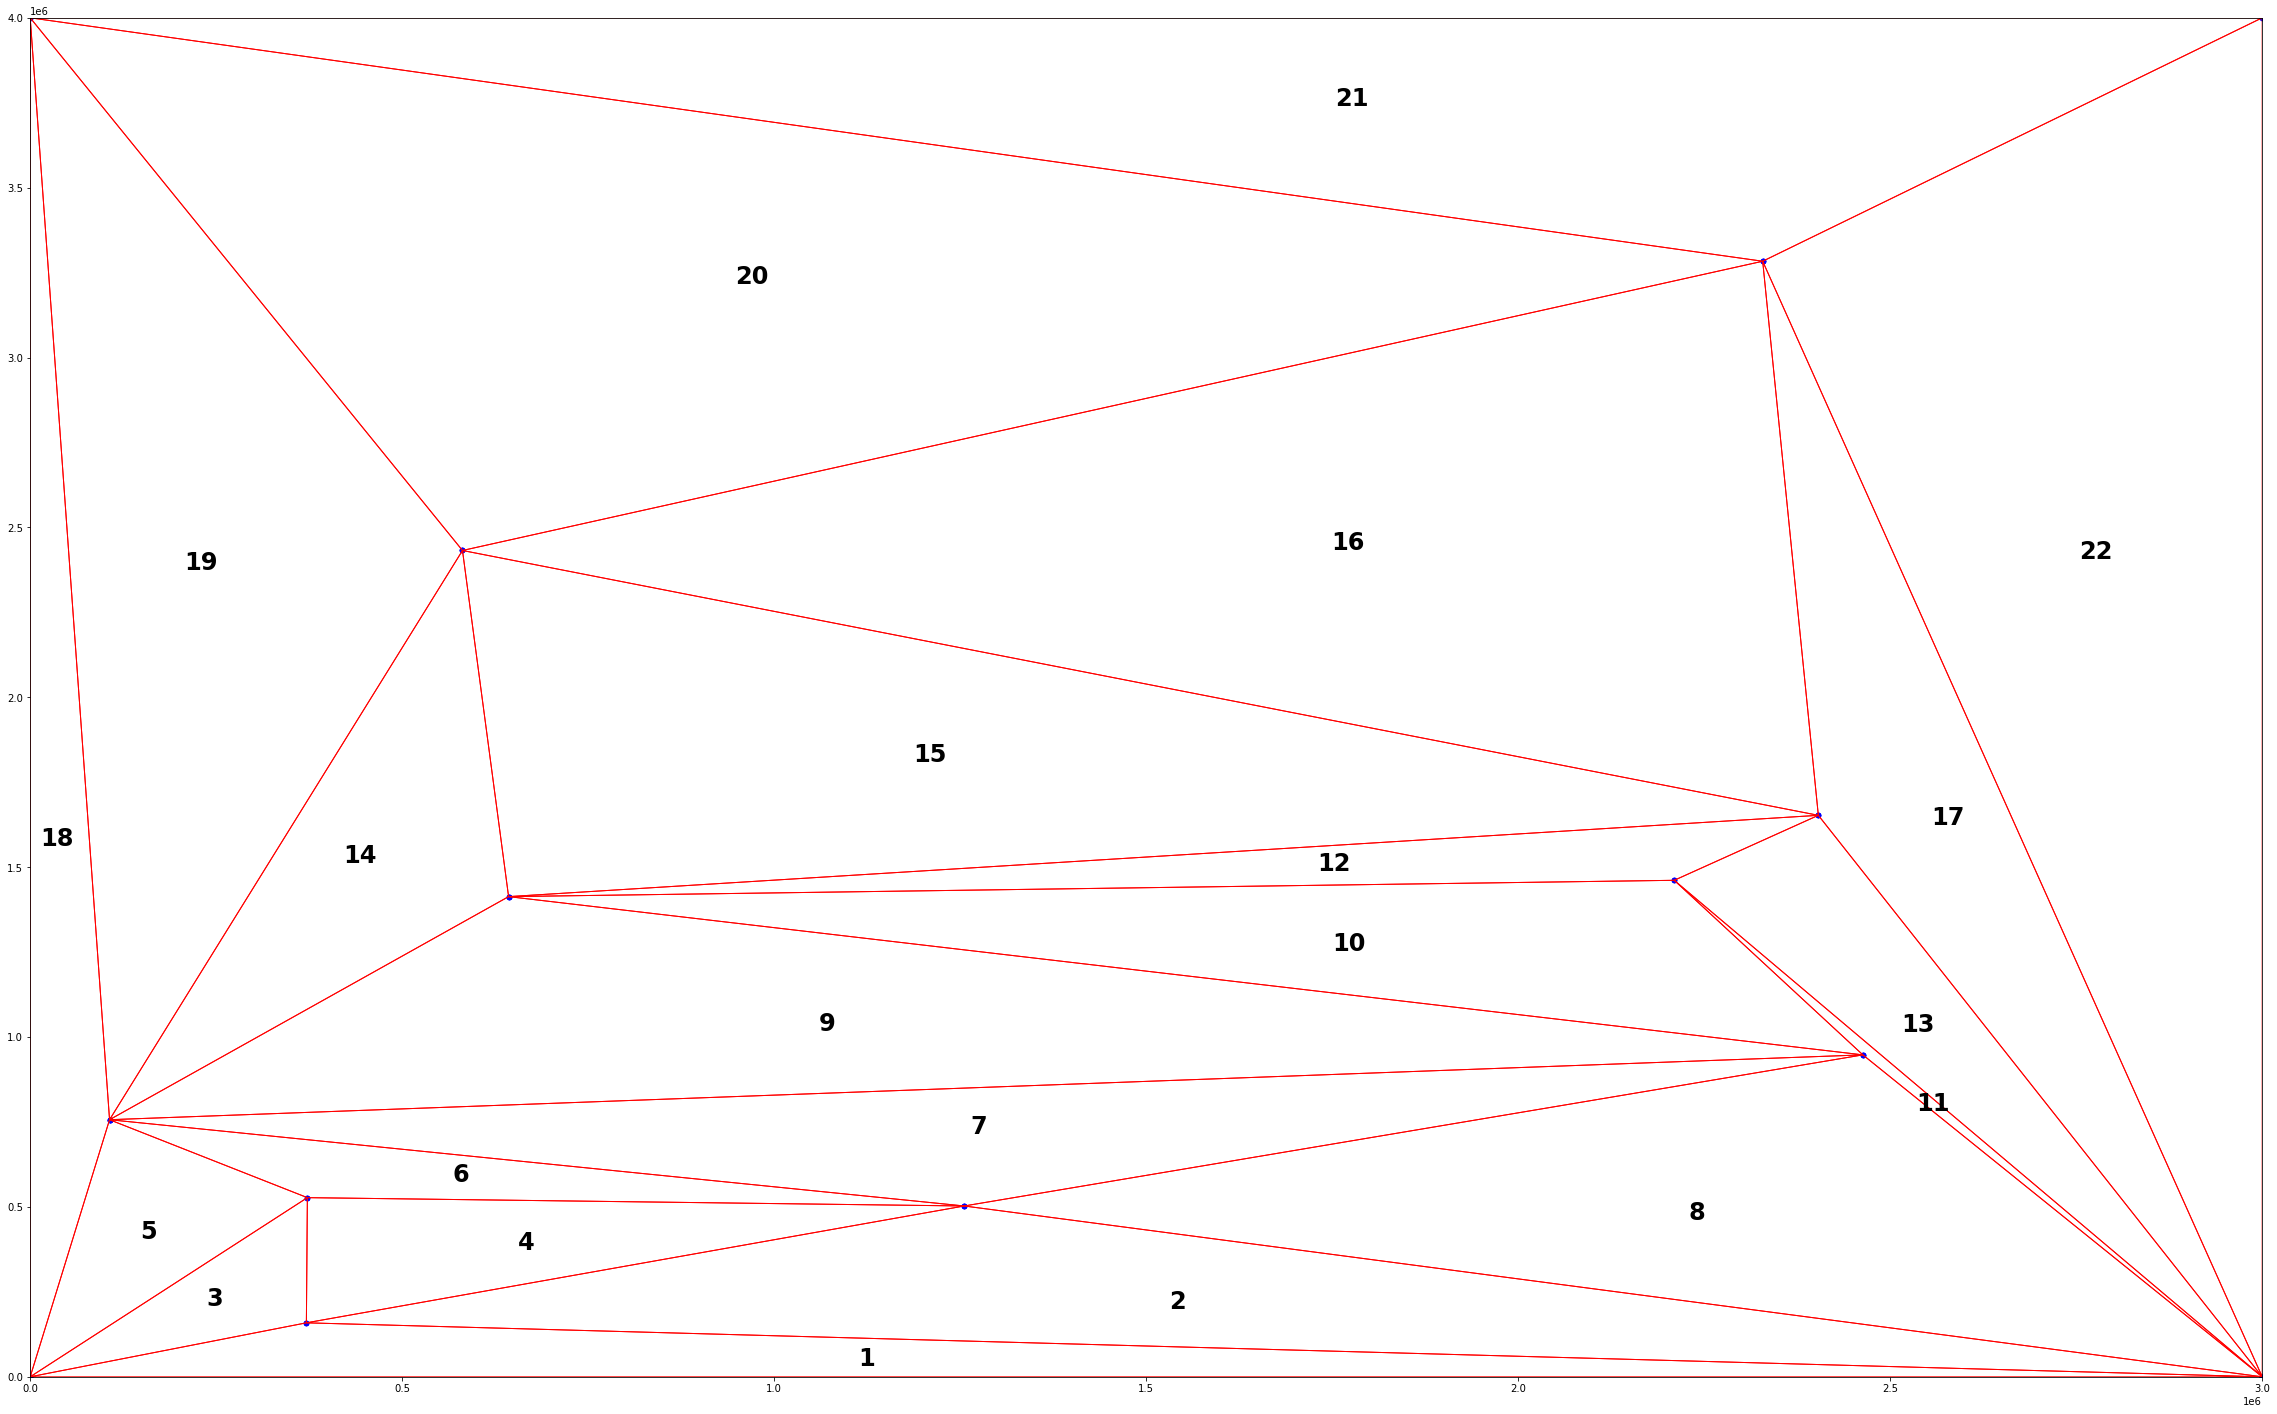

In [7]:
processEverything()

### Test Algorithm execution time for 1,000,000 points

In [6]:
points_count=1000000
generateRandomPoints()

In [7]:

start = time.time()
runTriangulationAlgorithm()
delta = time.time()-start
delta

19.979578971862793

In [13]:
from math import log2

entries = [2**n for n in range(1,20)]
executionTime = []

for e in entries:
    points_count=e
    generateRandomPoints()
    
    start = time.time()
    runTriangulationAlgorithm()
    delta = time.time()-start
    
    executionTime.append(delta)


In [18]:
def O(n):
    return n*log2(n)

### Estimate execution time

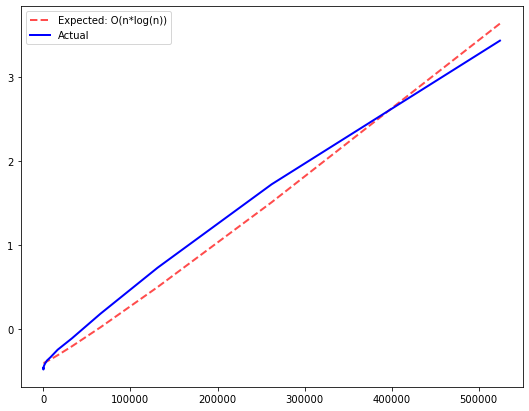

In [19]:
import pandas as pd
from statistics import mean


expected=[O(e) for e in entries]
expected_normalized = pd.DataFrame(expected)
expected_normalized=(expected_normalized-expected_normalized.mean())/expected_normalized.std()

executionTimeNormalized=pd.DataFrame(executionTime)
executionTimeNormalized=(executionTimeNormalized-executionTimeNormalized.mean())/executionTimeNormalized.std()

fig, ax = plt.subplots(1,1,figsize=(9,7))
ax.plot(entries,expected_normalized,"r",linewidth=2,label="Expected: O(n*log(n))",ls="--",alpha=0.7);
ax.plot(entries,executionTimeNormalized,"b",linewidth=2,label="Actual");
ax.legend();

ratio = [abs(executionTimeNormalized[0][i]-expected_normalized[0][i]) for i in range(19)]
plt.show()

In [ ]:
#debug
!cd ../target/ && java -jar triangulation.jar 3000000 4000000 ../python/points.txt ../python/triangulation.txt true